In [44]:
import pandas as pd
import numpy as np
df = pd.read_csv("US_Stock_Data.csv")

## Data Cleaning

In [45]:
# Set 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

# Drop empty column
df = df.drop(['Unnamed: 0'], axis = 1)

# Set the 'Date' as the index
df.set_index('Date', inplace=True)

# Remove commas from numbers and convert all columns to numeric
df_clean = df.replace({',': ''}, regex=True).apply(pd.to_numeric, errors='coerce')

## Exploratory Analysis

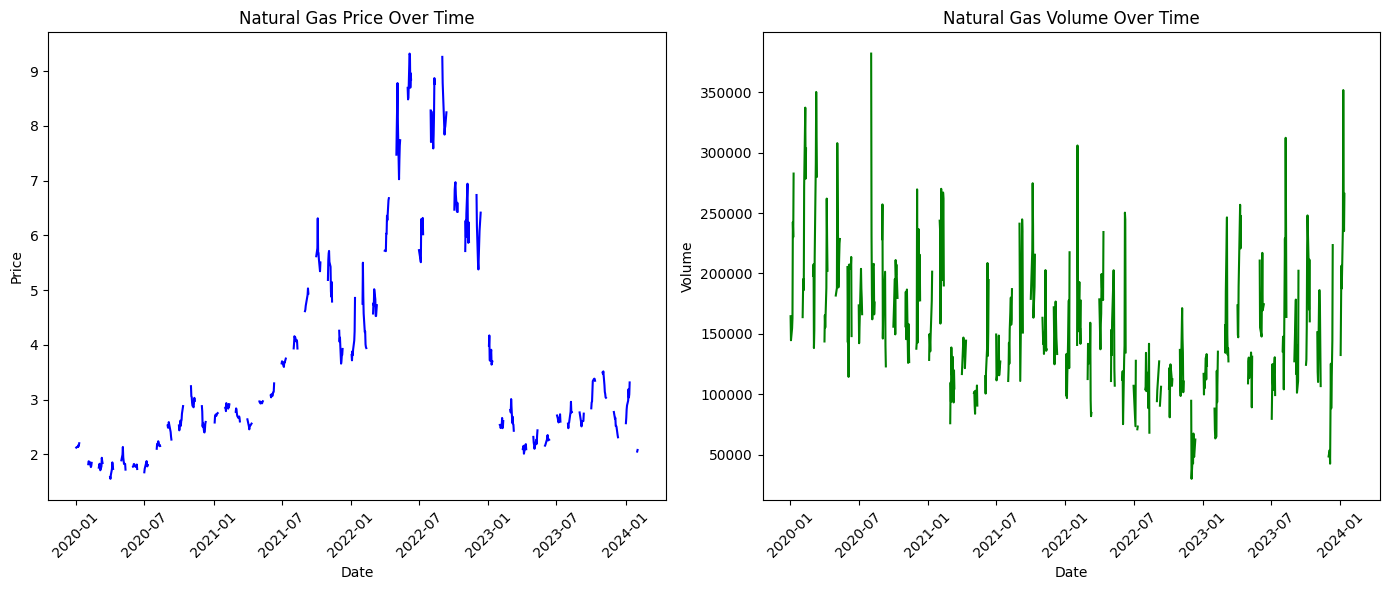

In [46]:
import matplotlib.pyplot as plt

# Create subplots: 1 row, 2 columns
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot Natural Gas Price on the first subplot
ax[0].plot(df.index, df['Natural_Gas_Price'], label='Natural Gas Price', color='blue')
ax[0].set_title('Natural Gas Price Over Time')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Price')
ax[0].tick_params(axis='x', rotation=45)

# Plot Natural Gas Volume on the second subplot
ax[1].plot(df.index, df['Natural_Gas_Vol.'], label='Natural Gas Volume', color='green')
ax[1].set_title('Natural Gas Volume Over Time')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Volume')
ax[1].tick_params(axis='x', rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show plot
plt.show()


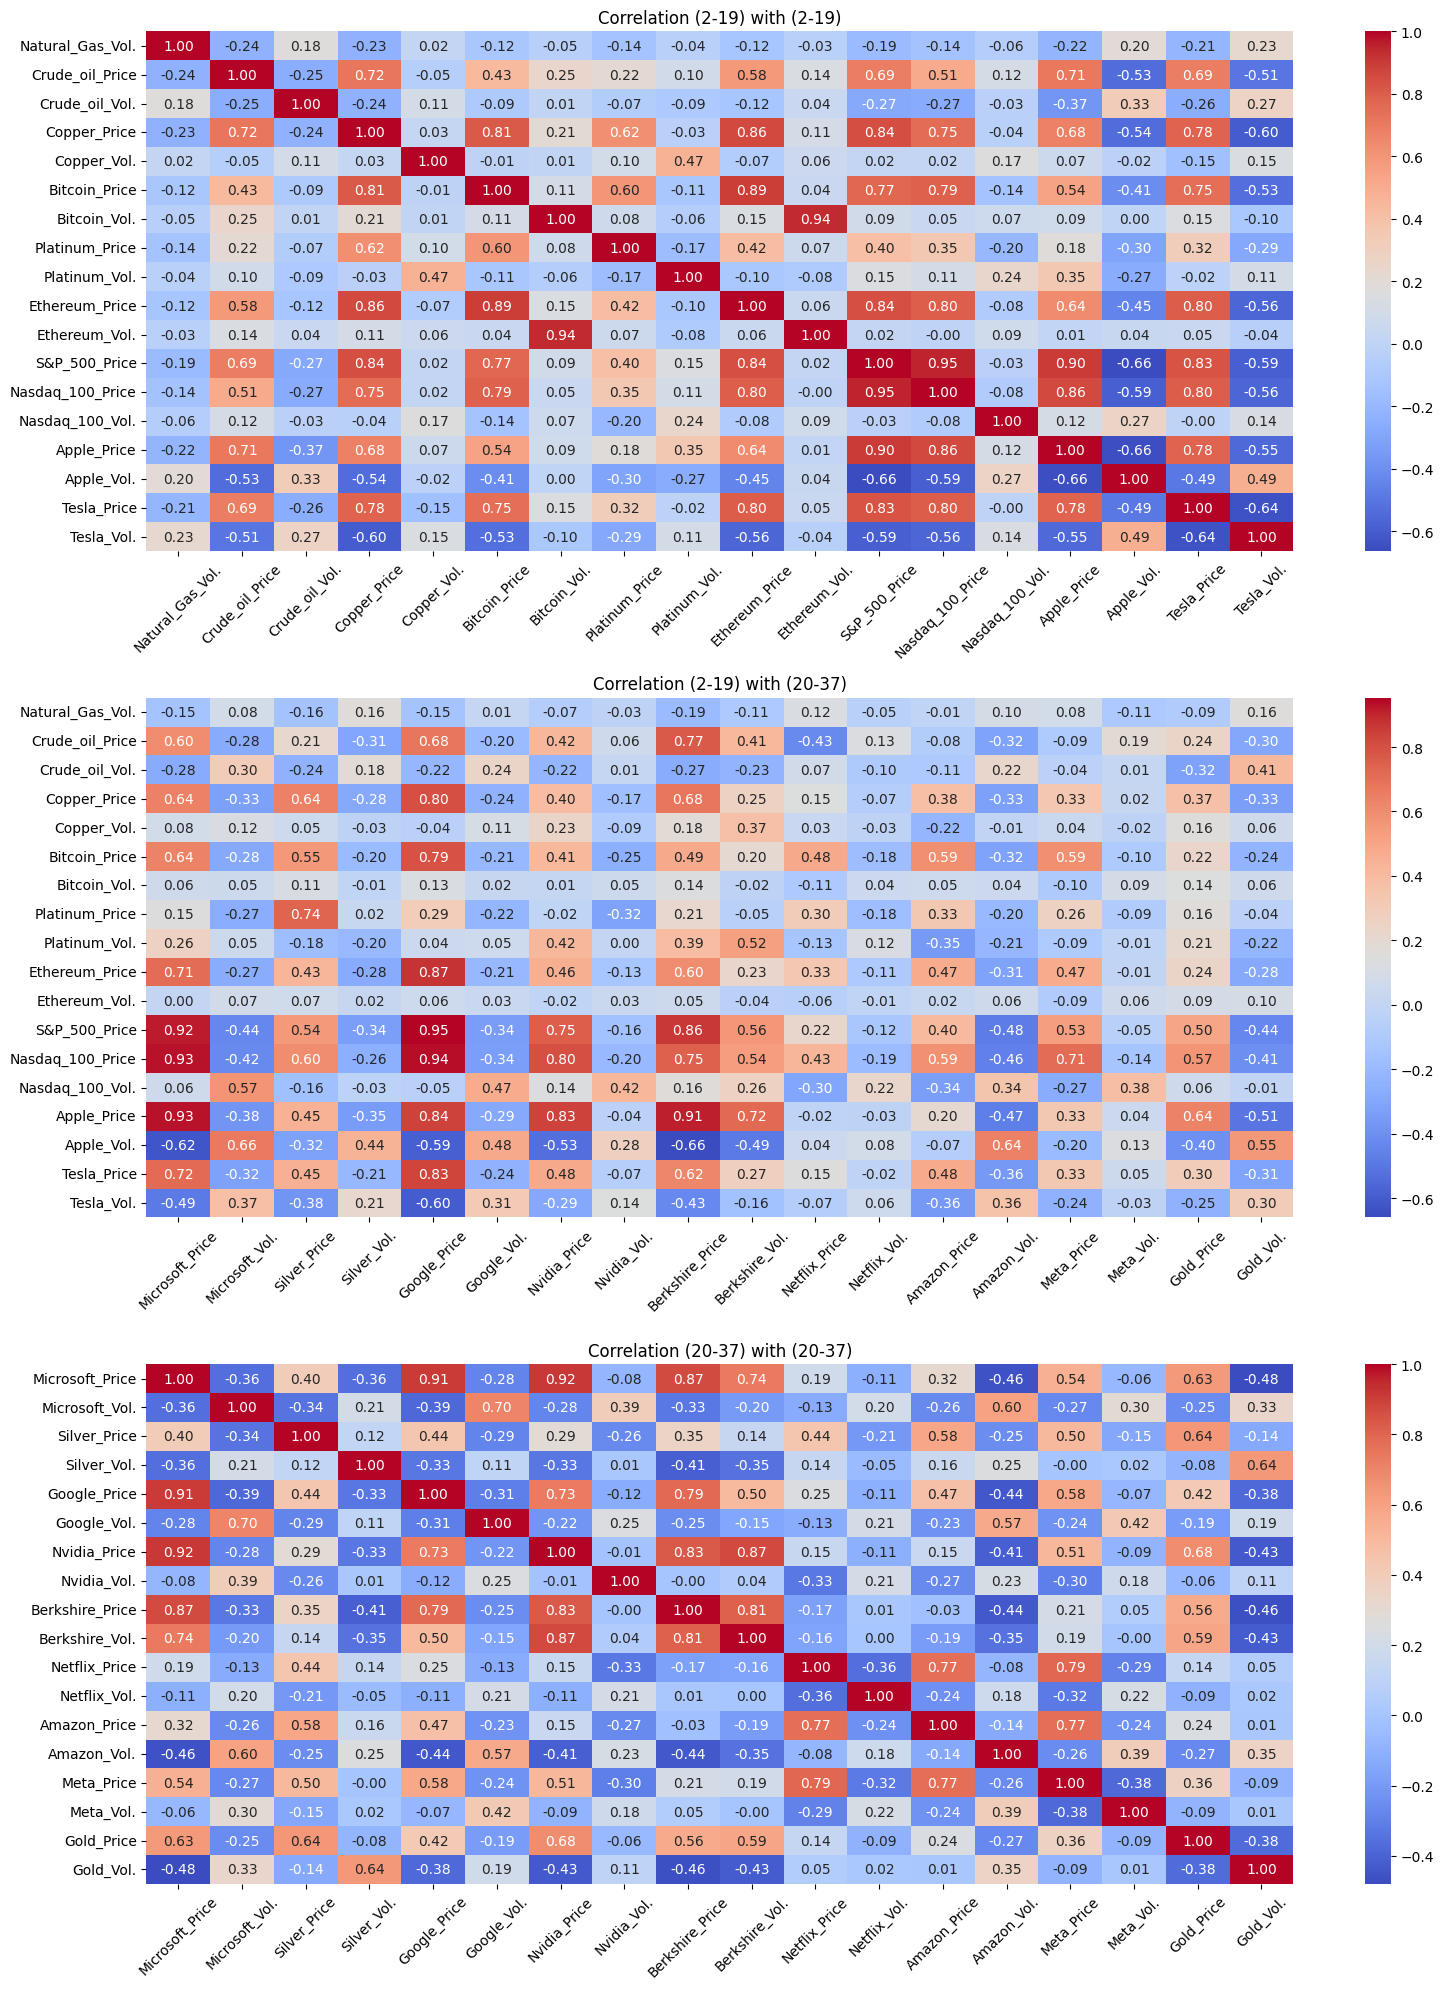

In [47]:
import seaborn as sns

# Define column indices
cols_2_to_19 = df_clean.columns[1:19]  # Columns 2 to 19 (index 1 to 18)
cols_20_to_37 = df_clean.columns[19:37]  # Columns 20 to 37 (index 19 to 36)

# Compute the correlation matrices
corr_2_19_2_19 = df_clean[cols_2_to_19].corr()
corr_2_19_20_37 = pd.concat([df_clean[cols_2_to_19], df_clean[cols_20_to_37]], axis=1).corr().iloc[:len(cols_2_to_19), len(cols_2_to_19):]
corr_20_37_20_37 = df_clean[cols_20_to_37].corr()

# Create a 3x1 grid of heatmaps
fig, axs = plt.subplots(3, 1, figsize=(16, 20))

# Plot the heatmaps
sns.heatmap(corr_2_19_2_19, annot=True, cmap='coolwarm', fmt='.2f', ax=axs[0])
axs[0].set_title('Correlation (2-19) with (2-19)')
plt.xticks(rotation=45)

sns.heatmap(corr_2_19_20_37, annot=True, cmap='coolwarm', fmt='.2f', ax=axs[1])
axs[1].set_title('Correlation (2-19) with (20-37)')
plt.xticks(rotation=45)

sns.heatmap(corr_20_37_20_37, annot=True, cmap='coolwarm', fmt='.2f', ax=axs[2])
axs[2].set_title('Correlation (20-37) with (20-37)')
plt.xticks(rotation=45)

# Rotate x tick labels
for ax in axs:
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

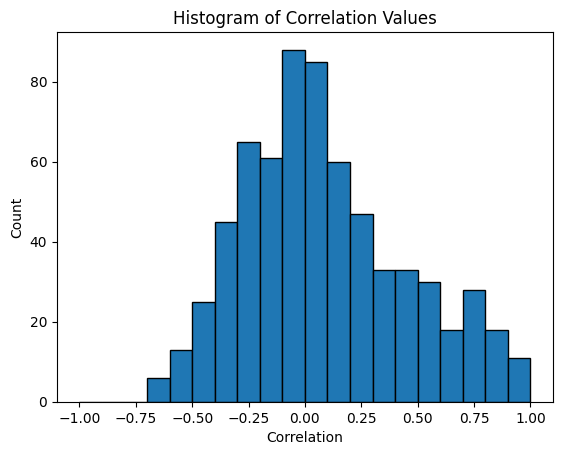

In [48]:
correlation_matrix = df_clean.corr()

# Flatten the correlation matrix into a 1D array (excluding the diagonal)
corr_values = correlation_matrix.values[np.triu_indices_from(correlation_matrix, k=1)]

# Create the histogram with bins of size 0.1
plt.hist(corr_values, bins=np.arange(-1, 1.1, 0.1), edgecolor='black')

# Add labels and title
plt.xlabel('Correlation')
plt.ylabel('Count')
plt.title('Histogram of Correlation Values')

# Show the plot
plt.show()

In [49]:
# Using threshold of > |0.9|
threshold = 0.7
significant_pairs = []
count = 0

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)): # Ensures self-correlatios of 1.0 are filtered out
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > threshold:
            significant_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_value))
            count += 1

for pair in significant_pairs:
    print(f'{pair[0]} and {pair[1]}: {pair[2]}')
print(f'There are {count} pairs.')

Natural_Gas_Price and Crude_oil_Price: 0.7001345176686659
Crude_oil_Price and Copper_Price: 0.7162875454591685
Crude_oil_Price and Apple_Price: 0.7076094079658993
Crude_oil_Price and Berkshire_Price: 0.769627833792967
Copper_Price and Bitcoin_Price: 0.8070434421731539
Copper_Price and Ethereum_Price: 0.8579003766760102
Copper_Price and S&P_500_Price: 0.8446337234341224
Copper_Price and Nasdaq_100_Price: 0.7481067159609547
Copper_Price and Tesla_Price: 0.7830887069878051
Copper_Price and Google_Price: 0.7974483444517032
Bitcoin_Price and Ethereum_Price: 0.8907206996012235
Bitcoin_Price and S&P_500_Price: 0.771438195563302
Bitcoin_Price and Nasdaq_100_Price: 0.7867486740323244
Bitcoin_Price and Tesla_Price: 0.7460796148603389
Bitcoin_Price and Google_Price: 0.7905748736499868
Bitcoin_Vol. and Ethereum_Vol.: 0.940570626280912
Platinum_Price and Silver_Price: 0.737899484537827
Ethereum_Price and S&P_500_Price: 0.8417748033884703
Ethereum_Price and Nasdaq_100_Price: 0.7968009086071829
Ether

In [50]:
stock_prices = df[['Apple_Price', 'Tesla_Price', 'Microsoft_Price', 'Google_Price', 'Nvidia_Price', 
                   'Berkshire_Price', 'Netflix_Price', 'Amazon_Price', 'Meta_Price']]
commodity_prices = df[['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Bitcoin_Price', 
                       'Platinum_Price', 'Ethereum_Price', 'Silver_Price', 'Gold_Price']]
stock_volume = df[['Apple_Vol.', 'Tesla_Vol.', 'Microsoft_Vol.', 'Google_Vol.', 'Nvidia_Vol.', 
                   'Berkshire_Vol.', 'Netflix_Vol.', 'Amazon_Vol.', 'Meta_Vol.']]
commodity_volume = df[['Natural_Gas_Vol.', 'Crude_oil_Vol.', 'Copper_Vol.', 'Bitcoin_Vol.', 
                       'Platinum_Vol.', 'Ethereum_Vol.', 'Silver_Vol.', 'Gold_Vol.']]

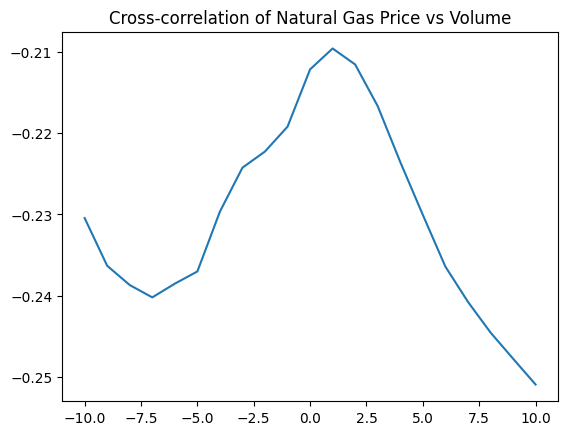

In [51]:
from statsmodels.tsa.stattools import ccf
import matplotlib.pyplot as plt

lags = range(-10, 11)
cross_corr = [df['Natural_Gas_Vol.'].shift(lag).corr(df['Natural_Gas_Price']) for lag in lags]
plt.plot(lags, cross_corr)
plt.title('Cross-correlation of Natural Gas Price vs Volume')
plt.show()